In [1]:
#导入相应包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#导入数据
testSet = pd.read_table('testSet.txt',header=None)

In [4]:
testSet.head()

,0,1
0,10.235186,11.321997
1,10.122339,11.810993
2,9.190236,8.904943
3,9.306371,9.847394
4,8.330131,8.340352


In [3]:
testSet.shape

(1000, 2)

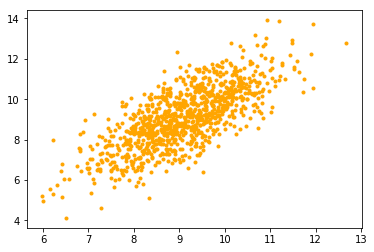

In [5]:
#查看原始数据分布
plt.scatter(testSet.iloc[:,0],testSet.iloc[:,1],marker = '.',c='orange');

In [6]:
dataSet = testSet

In [8]:
dataSet.head()

,0,1
0,10.235186,11.321997
1,10.122339,11.810993
2,9.190236,8.904943
3,9.306371,9.847394
4,8.330131,8.340352


In [7]:
#计算均值
meanVals = dataSet.mean(0)
meanVals

0    9.063936
1    9.096002
dtype: float64

In [11]:
#去均值化，均值变为0 
meanRemoved = dataSet - meanVals
meanRemoved.head(3)

,0,1
0,1.171250,2.225995
1,1.058403,2.714991
2,0.126300,-0.191059


In [12]:
#计算协方差矩阵
covMat = np.mat(np.cov(meanRemoved, rowvar=0))
covMat

matrix([[1.05198368, 1.1246314 ],
        [1.1246314 , 2.21166499]])

In [13]:
#计算方差矩阵的特征值和右特征向量
eigVals,eigVects = np.linalg.eig(covMat)

In [14]:
eigVals

array([0.36651371, 2.89713496])

In [15]:
eigVals.shape

(2,)

In [16]:
eigVects

matrix([[-0.85389096, -0.52045195],
        [ 0.52045195, -0.85389096]])

In [17]:
eigVects.shape

(2, 2)

In [18]:
#对特征值排序，.argsort()函数默认从小到大排序
eigValInd = np.argsort(eigVals) 

In [19]:
eigValInd

array([0, 1], dtype=int64)

In [20]:
#提取出最大的N个特征
N=1
eigValInd = eigValInd[:-(N+1):-1]
eigValInd

array([1], dtype=int64)

In [21]:
redEigVects = eigVects[:,eigValInd] 
redEigVects

matrix([[-0.52045195],
        [-0.85389096]])

In [23]:
lowDDataMat = np.mat(meanRemoved) * redEigVects #注意此处meanRemoved要转换成矩阵
lowDDataMat[:10]

matrix([[-2.51033597],
        [-2.86915379],
        [ 0.09741085],
        [-0.76778222],
        [ 1.02715333],
        [-1.44409178],
        [-2.17360352],
        [-0.7739988 ],
        [-1.09983463],
        [-1.70275987]])

In [24]:
reconMat = (lowDDataMat * redEigVects.T) + np.mat(meanVals)

In [25]:
reconMat

matrix([[10.37044569, 11.23955536],
        [10.55719313, 11.54594665],
        [ 9.01323877,  9.01282393],
        ...,
        [ 9.32502753,  9.52436704],
        [ 9.0946364 ,  9.14637075],
        [ 9.16271152,  9.2580597 ]])

In [26]:
testSet.head()

,0,1
0,10.235186,11.321997
1,10.122339,11.810993
2,9.190236,8.904943
3,9.306371,9.847394
4,8.330131,8.340352


In [27]:
def pca(dataSet, N=9999999):
    meanVals = dataSet.mean(0)                      
    meanRemoved = dataSet - meanVals               
    covMat = np.mat(np.cov(meanRemoved, rowvar=0))  
    eigVals,eigVects = np.linalg.eig(covMat)       
    eigValInd = np.argsort(eigVals)                 
    eigValInd = eigValInd[:-(N+1):-1]       
    redEigVects = eigVects[:,eigValInd]            
    lowDDataMat = np.mat(meanRemoved) * redEigVects 
    reconMat = (lowDDataMat * redEigVects.T) + np.mat(meanVals)
    return lowDDataMat, reconMat

In [28]:
lowDDataMat, reconMat = pca(testSet, N=1)

In [30]:
lowDDataMat[:5]

matrix([[-2.51033597],
        [-2.86915379],
        [ 0.09741085],
        [-0.76778222],
        [ 1.02715333]])

In [31]:
reconMat[:5]

matrix([[10.37044569, 11.23955536],
        [10.55719313, 11.54594665],
        [ 9.01323877,  9.01282393],
        [ 9.46353019,  9.75160448],
        [ 8.52935248,  8.21892524]])

In [32]:
reconMat.shape

(1000, 2)

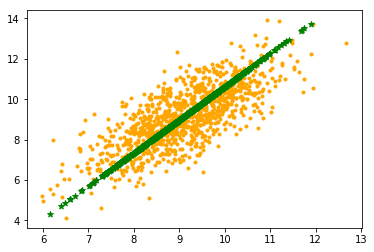

In [33]:
plt.scatter(testSet.iloc[:,0],testSet.iloc[:,1],marker = '.',c='orange')
plt.scatter(reconMat[:,0].A.flatten(),reconMat[:,1].A.flatten(), marker='*',c='g');

In [34]:
lowDDataMat, reconMat = pca(testSet, N=2)

In [35]:
lowDDataMat[:5]

matrix([[-2.51033597,  0.15840394],
        [-2.86915379,  0.5092619 ],
        [ 0.09741085, -0.20728318],
        [-0.76778222,  0.18405066],
        [ 1.02715333,  0.23331022]])

In [37]:
reconMat[:5]

matrix([[10.235186, 11.321997],
        [10.122339, 11.810993],
        [ 9.190236,  8.904943],
        [ 9.306371,  9.847394],
        [ 8.330131,  8.340352]])

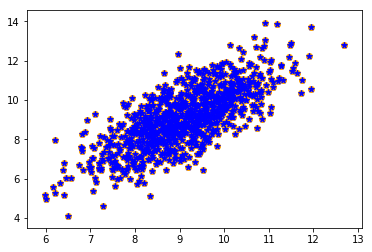

In [38]:
#将原数据和压缩后的数据放在一张里面：
plt.scatter(testSet.iloc[:,0],testSet.iloc[:,1],marker = 'o',c='orange')
plt.scatter(reconMat[:,0].A.flatten(),reconMat[:,1].A.flatten(), marker='*',c='b');

In [39]:
secom = pd.read_table('secom.data',sep = ' ',header = None)

In [40]:
secom.head()

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432


In [41]:
secom.shape

(1567, 590)

In [43]:
secom1=secom.copy()

In [45]:
np.isnan(secom1.iloc[:,0]).mean()

0.0038289725590299937

In [46]:
#1.删除缺失值大于等于80%的特征
secom1=secom.copy()
nanInd = []
for i in range(secom1.shape[1]):
    nan = np.isnan(secom1.iloc[:,i]).mean()
    if nan*100>=80:
        print(f'第{i}列的缺失值比例为{round(nan*100,2)}%')
        nanInd.append(i)

第85列的缺失值比例为85.58%
第157列的缺失值比例为91.19%
第158列的缺失值比例为91.19%
第220列的缺失值比例为85.58%
第292列的缺失值比例为91.19%
第293列的缺失值比例为91.19%
第358列的缺失值比例为85.58%
第492列的缺失值比例为85.58%


In [47]:
nanInd

[85, 157, 158, 220, 292, 293, 358, 492]

In [48]:
secom1.drop(secom1.columns[nanInd],axis=1,inplace=True)

In [49]:
secom1.shape

(1567, 582)

In [50]:
#查看处理结果
secom1.head()
secom1.shape

(1567, 582)

In [51]:
#2.缺失值比例小于80%的特征用均值填补缺失值
for i in secom1.columns:
    secom1[i].fillna(secom1[i].mean(),inplace = True)

In [53]:
secom1.head()

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,0.005396,97.934373,0.5005,0.0118,0.0035,2.3630,0.021458,0.016475,0.005283,99.670066
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.006000,208.204500,0.5019,0.0223,0.0055,4.4447,0.009600,0.020100,0.006000,208.204500
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.014800,82.860200,0.4958,0.0157,0.0039,3.1745,0.058400,0.048400,0.014800,82.860200
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.004400,73.843200,0.4990,0.0103,0.0025,2.0544,0.020200,0.014900,0.004400,73.843200
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,0.005396,97.934373,0.4800,0.4766,0.1045,99.3032,0.020200,0.014900,0.004400,73.843200


In [56]:
(secom1.isnull()).sum().value_counts()

0    582
dtype: int64

In [59]:
#计算均值
meanVals = secom1.mean()
meanVals[:5]

0    3014.452896
1    2495.850231
2    2200.547318
3    1396.376627
4       4.197013
dtype: float64

In [61]:
#去均值化
meanRemoved = secom1 - meanVals
meanRemoved.head(3)

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
0,16.477104,68.149769,-12.814018,14.749873,-2.836813,0.0,-3.499608,0.002378,0.037638,0.017041,...,-1.058181e-16,-2.387424e-12,0.000404,-0.003518,-0.000347,-0.704826,0.000000,3.469447e-18,8.673617e-19,-1.421085e-14
1,81.327104,-30.710231,29.874882,67.283973,-3.367613,0.0,1.230392,0.002878,0.033738,0.000341,...,6.040453e-04,1.102701e+02,0.001804,0.006982,0.001653,1.376874,-0.011858,3.625096e-03,7.166667e-04,1.085344e+02
2,-81.842896,64.089769,-14.136218,301.640573,-2.686813,0.0,-5.625108,0.002278,-0.019262,0.004941,...,9.404045e-03,-1.507417e+01,-0.004296,0.000382,0.000053,0.106674,0.036942,3.192510e-02,9.516667e-03,-1.680987e+01


In [62]:
#计算协方差
covMat = np.mat(np.cov(meanRemoved, rowvar=0))
covMat
covMat.shape

(582, 582)

In [63]:
#计算特征值和特征向量
eigVals,eigVects = np.linalg.eig(covMat)

In [64]:
eigVects.shape

(582, 582)

In [65]:
eigVals.shape

(582,)

In [66]:
eigVals

array([ 5.34151972e+07+0.0000000e+00j,  2.17466556e+07+0.0000000e+00j,
        8.24837561e+06+0.0000000e+00j,  2.07388058e+06+0.0000000e+00j,
        1.31540428e+06+0.0000000e+00j,  4.67693551e+05+0.0000000e+00j,
        2.90860405e+05+0.0000000e+00j,  2.83664812e+05+0.0000000e+00j,
        2.37149524e+05+0.0000000e+00j,  2.07805581e+05+0.0000000e+00j,
        1.96098844e+05+0.0000000e+00j,  1.86349221e+05+0.0000000e+00j,
        1.52398976e+05+0.0000000e+00j,  1.13196837e+05+0.0000000e+00j,
        1.08492589e+05+0.0000000e+00j,  1.02844712e+05+0.0000000e+00j,
        1.00165252e+05+0.0000000e+00j,  8.33270443e+04+0.0000000e+00j,
        8.15567136e+04+0.0000000e+00j,  7.76364705e+04+0.0000000e+00j,
        6.66003172e+04+0.0000000e+00j,  6.52615994e+04+0.0000000e+00j,
        5.96387189e+04+0.0000000e+00j,  5.16264961e+04+0.0000000e+00j,
        5.03258211e+04+0.0000000e+00j,  4.54574274e+04+0.0000000e+00j,
        4.41913334e+04+0.0000000e+00j,  4.15467249e+04+0.0000000e+00j,
      

In [67]:
#计算特征值为0的个数
(eigVals==0).sum()

116

In [68]:
#计算特征值为0比例
(eigVals==0).sum()/len(eigVals)

0.19931271477663232